In [1]:
import seml
import pandas as pd
from matplotlib import pyplot as plt
pd.options.display.max_columns = 100

/home/icb/leon.hetzel/miniconda3/envs/py38/lib/python3.8/site-packages/seml/database.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
results = seml.get_results('lincs_small_5', to_data_frame=True, fields=['config', 'result', 'host']) #fields=['result']|

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

/home/icb/leon.hetzel/miniconda3/envs/py38/lib/python3.8/site-packages/seml/evaluation.py:80: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  parsed = pd.io.json.json_normalize(parsed, sep='.')


In [3]:
results

,_id,config.overwrite,config.db_collection,config.dataset.data_params.covariate_keys,config.dataset.data_params.dataset_path,config.dataset.data_params.dose_key,config.dataset.data_params.mol_featurizer,config.dataset.data_params.perturbation_key,config.dataset.data_params.smiles_key,config.dataset.data_params.split_key,config.dataset.dataset_type,config.model.additional_params.decoder_activation,config.model.additional_params.doser_type,config.model.additional_params.loss_ae,config.model.additional_params.patience,config.model.additional_params.seed,config.model.gnn_model.GCN.hparams.n_layers,config.model.gnn_model.hparams.n_layers,config.model.gnn_model.model_type,config.model.hparams.adversary_depth,config.model.hparams.adversary_lr,config.model.hparams.adversary_steps,config.model.hparams.adversary_wd,config.model.hparams.adversary_width,config.model.hparams.autoencoder_depth,config.model.hparams.autoencoder_lr,config.model.hparams.autoencoder_wd,config.model.hparams.autoencoder_width,config.model.hparams.batch_size,config.model.hparams.dim,config.model.hparams.dosers_depth,config.model.hparams.dosers_lr,config.model.hparams.dosers_wd,config.model.hparams.dosers_width,config.model.hparams.dropout,config.model.hparams.penalty_adversary,config.model.hparams.reg_adversary,config.model.hparams.step_size_lr,config.training.checkpoint_freq,config.training.ignore_evaluation,config.training.max_minutes,config.training.num_epochs,config.training.save_checkpoints,config.training.save_dir,config.seed,host.hostname,host.os,host.python_version,host.cpu,host.gpus.gpus,host.gpus.driver_version,result.epoch,result.stats_epoch,result.loss_reconstruction,result.loss_adv_drugs,result.loss_adv_covariates,result.penalty_adv_drugs,result.penalty_adv_covariates,result.elapsed_time_min,result.training,result.test,result.ood,result.perturbation disentanglement,result.optimal for perturbations,result.covariate disentanglement,result.optimal for covariates,result.total_epochs
0,1,1,lincs_small_5,cell_id,datasets/lincs_smiles.h5ad,pert_dose,canonical,pert_id,canonical_smiles,split1,lincs,linear,None,gauss,3,0,2,2,None,4,0.000056,1,0.000013,128,3,0.000561,1.329292e-07,512,64,256,1,0.000561,1.329292e-07,32,0.187270,0.132929,0.314891,25,40,False,600,2000,True,sweeps/checkpoints,956420969,icb-gpusrv07.scidom.de,"[Linux, Linux-3.10.0-1160.11.1.el7.x86_64-x86_...",3.8.8,Intel(R) Xeon(R) Gold 6230 CPU @ 2.10GHz,"[{'model': 'Tesla V100-PCIE-16GB', 'total_memo...",460.32.03,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0, 40, 80, 120, 160]","[2786.735509455204, 1048.1539880633354, 692.70...","[1629.2242706418037, 1628.702716767788, 1628.4...","[15476.55581998825, 15930.881268501282, 16064....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",55.632170,"[[0.7985453041191961, 0.8001831465735557, -0.0...","[[0.8590275785224898, 0.8464720535108775, 0.32...","[[0.859416351943385, 0.8351321016176444, 0.145...","[[0], [0], [0], [0], 0.022301067547654877]","[0.0010204081632653062, 0.0010204081632653062,...","[[0], [0], [0], [0], [0.9973794955543802]]","[[0.012195121951219513], [0.012195121951219513...",160
1,2,2,lincs_small_5,cell_id,datasets/lincs_smiles.h5ad,pert_dose,canonical,pert_id,canonical_smiles,split1,lincs,linear,None,gauss,3,0,2,2,None,4,0.000797,5,0.000711,128,4,0.007969,7.114476e-06,1024,128,256,1,0.007969,7.114476e-06,128,0.475357,7.114476,63.512210,45,40,False,600,2000,True,sweeps/checkpoints,409983816,gpusrv10.scidom.de,"[Linux, Linux-3.10.0-1160.25.1.el7.x86_64-x86_...",3.8.8,Intel(R) Xeon(R) Gold 6226R CPU @ 2.90GHz,"[{'model': 'NVIDIA Tesla V100S-PCIE-32GB', 'to...",465.19.01,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0, 40, 80, 120, 160]","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan,

In [15]:
loss_results = results.loc[:, [c for c in list(results) if 'result.loss' in c]].copy()

(0.0, 400.0)

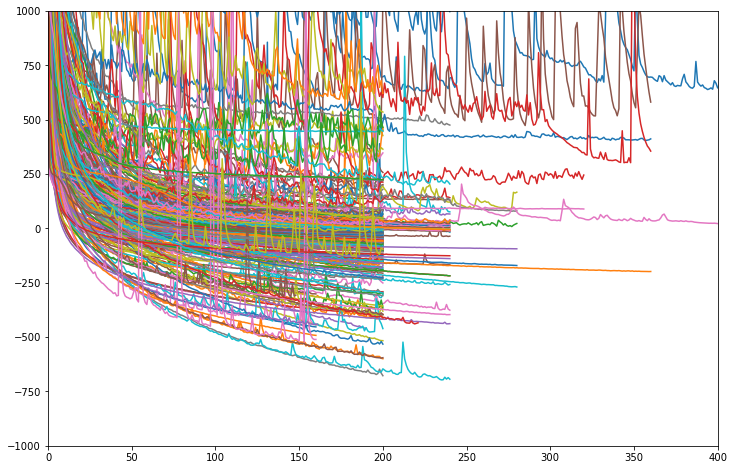

In [35]:
import numpy as np

fig, ax = plt.subplots(figsize=(12,8))
loss_results['loss_reconstruction'] = 1e5
for i, run in enumerate(loss_results['result.loss_reconstruction']): 
    ax.plot(run)
    loss_results.loc[i, 'loss_reconstruction'] = run[-1]
ax.set_ylim([-1000,1000])
ax.set_xlim([0,400])

In [38]:
cond = loss_results.loss_reconstruction < -500
loss_results[cond]

,result.loss_reconstruction,result.loss_adv_drugs,result.loss_adv_covariates,loss_reconstruction
21,"[4429.570281326771, 1600.8387582302094, 1122.1...","[1548.2605267763138, 1220.297448605299, 771.16...","[12215.520065307617, 10928.896884918213, 9572....",-599.587291
37,"[5273.937937736511, 1698.6605538129807, 1168.4...","[1381.6653618514538, 904.94968354702, 583.5767...","[12994.052502632141, 11503.655702114105, 9751....",-677.646087
78,"[4030.9150454998016, 2062.0878543257713, 1788....","[1453.323929488659, 1255.8332996368408, 1006.7...","[10137.976149559021, 8250.439172506332, 7732.7...",-516.560603
89,"[3111.6762761473656, 1968.1385987401009, 1623....","[1119.895319968462, 478.25142972171307, 266.02...","[10224.338170051575, 8266.05052947998, 7864.74...",-693.732472
180,"[3607.8429555892944, 1957.0669172406197, 1578....","[1371.2940177321434, 1266.088909804821, 1059.4...","[9683.202901124954, 8233.193258047104, 7786.65...",-532.343960
285,"[6069.711614906788, 1822.7329741716385, 1367.6...","[1080.3050434589386, 535.218443363905, 320.171...","[11494.703802108765, 8956.650183200836, 6880.2...",-594.865517
286,"[2043.6301384270191, 1002.1642064750195, 735.6...","[1632.2341367602348, 1636.1115308403969, 1638....","[17345.710584640503, 17737.12637615204, 17825....",-510.907679


In [39]:
results[cond]

,_id,config.overwrite,config.db_collection,config.dataset.data_params.covariate_keys,config.dataset.data_params.dataset_path,config.dataset.data_params.dose_key,config.dataset.data_params.mol_featurizer,config.dataset.data_params.perturbation_key,config.dataset.data_params.smiles_key,config.dataset.data_params.split_key,config.dataset.dataset_type,config.model.additional_params.decoder_activation,config.model.additional_params.doser_type,config.model.additional_params.loss_ae,config.model.additional_params.patience,config.model.additional_params.seed,config.model.gnn_model.GCN.hparams.n_layers,config.model.gnn_model.hparams.n_layers,config.model.gnn_model.model_type,config.model.hparams.adversary_depth,config.model.hparams.adversary_lr,config.model.hparams.adversary_steps,config.model.hparams.adversary_wd,config.model.hparams.adversary_width,config.model.hparams.autoencoder_depth,config.model.hparams.autoencoder_lr,config.model.hparams.autoencoder_wd,config.model.hparams.autoencoder_width,config.model.hparams.batch_size,config.model.hparams.dim,config.model.hparams.dosers_depth,config.model.hparams.dosers_lr,config.model.hparams.dosers_wd,config.model.hparams.dosers_width,config.model.hparams.dropout,config.model.hparams.penalty_adversary,config.model.hparams.reg_adversary,config.model.hparams.step_size_lr,config.training.checkpoint_freq,config.training.ignore_evaluation,config.training.max_minutes,config.training.num_epochs,config.training.save_checkpoints,config.training.save_dir,config.seed,host.hostname,host.os,host.python_version,host.cpu,host.gpus.gpus,host.gpus.driver_version,result.epoch,result.stats_epoch,result.loss_reconstruction,result.loss_adv_drugs,result.loss_adv_covariates,result.penalty_adv_drugs,result.penalty_adv_covariates,result.elapsed_time_min,result.training,result.test,result.ood,result.perturbation disentanglement,result.optimal for perturbations,result.covariate disentanglement,result.optimal for covariates,result.total_epochs
21,22,22,lincs_small_5,cell_id,datasets/lincs_smiles.h5ad,pert_dose,canonical,pert_id,canonical_smiles,split1,lincs,linear,None,gauss,3,0,2,2,None,3,0.000019,2,0.000003,64,5,0.000190,2.621088e-08,1024,64,128,3,0.000190,2.621088e-08,64,0.069747,0.026211,0.036139,45,40,False,600,2000,True,sweeps/checkpoints,874260897,supergpu05.scidom.de,"[Linux, Linux-3.10.0-1160.25.1.el7.x86_64-x86_...",3.8.8,AMD EPYC 7742 64-Core Processor,"[{'model': 'NVIDIA A100-SXM4-40GB', 'total_mem...",465.19.01,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0, 40, 80, 120, 160, 200]","[4429.570281326771, 1600.8387582302094, 1122.1...","[1548.2605267763138, 1220.297448605299, 771.16...","[12215.520065307617, 10928.896884918213, 9572....","[625.6972546726465, 948.2746413946152, 1683.70...","[207.32551106065512, 529.9702714383602, 353.65...",85.669168,"[[0.8016765094822547, 0.7084591547504727, -1.9...","[[0.7829714009906649, 0.47013999366793063, -0....","[[0.7854548078162168, 0.46212534551227363, -0....","[[0], [0], [0], [0], [0], 0.00833991595638511]","[0.0010204081632653062, 0.0010204081632653062,...","[[0], [0], [0], [0], [0], [0.7223658748214034]]","[[0.012195121951219513], [0.012195121951219513...",200
37,38,38,lincs_small_5,cell_id,datasets/lincs_smiles.h5ad,pert_dose,canonical,pert_id,canonical_smiles,split1,lincs,linear,None,gauss,3,0,2,2,None,2,0.000016,2,0.000002,64,3,0.000157,1.963434e-08,1024,64,512,2,0.000157,1.963434e-08,64,0.048836,0.019634,0.024586,25,40,False,600,2000,True,sweeps/checkpoints,109629394,gpusrv10.scidom.de,"[Linux, Linux-3.10.0-1160.25.1.el7.x86_64-x86_...",3.8.8,Intel(R) Xeon(R) Gold 6226R CPU @ 2.90GHz,"[{'model': 'NVIDIA Tesla V100S-PCIE-32GB', 'to...",465.19.01,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0, 40, 80, 120, 160, 200]","[5273.937937736511, 1698.6605538129807, 1168.4...","[1381.6653618514538, 904.94968354702, 583.5767...","[12994.052502632141, 11503.655702114105, 9751....","[523.5836099088192, 398.45682403445244, 558.85...","[43.93973899818957, 

In [42]:
r2_results = results.loc[:, ['result.training','result.test','result.ood']].copy()

In [48]:
r2_results.loc[cond, 'result.training']

21     [[0.8016765094822547, 0.7084591547504727, -1.9...
37     [[0.5624423881161588, 0.3173295514096924, -3.4...
78     [[0.706132628033089, 0.5968687148005464, -4.92...
89     [[0.7534248668526609, 0.6508741635405983, -2.7...
180    [[0.761910584998056, 0.6957741796519473, -3.32...
285    [[0.7979024696952328, 0.7269594735710033, -2.7...
286    [[0.8027614629269062, 0.7227807337101897, 0.11...
Name: result.training, dtype: object

In [69]:
def plot_r2(idx, setting, ax):
    if ax is None: 
        fig, ax = plt.subplots()
    for i, case in enumerate(['mean_all', 'mean_de']): 
        x = np.array(r2_results.loc[idx, f'result.{setting}'])[:,i]
        ax.plot(x,'x-' ,c=f'C{i}')
        ax.set_title(setting)
        


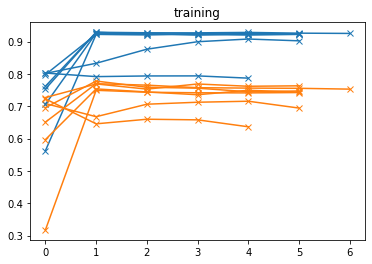

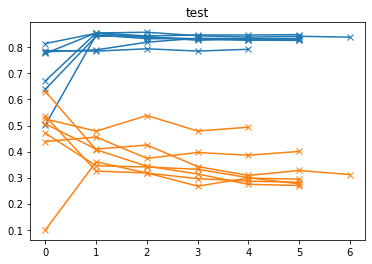

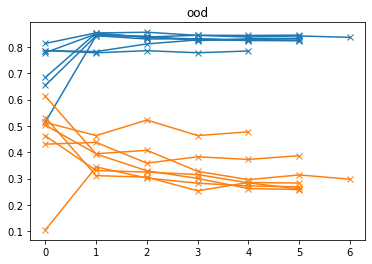

In [71]:
for setting in ['training', 'test', 'ood']: 
    fig, ax = plt.subplots()
    [plot_r2(idx, setting, ax) for idx in results[cond].index]
    

In [72]:
r2_results.loc[cond, f'result.ood'].apply(lambda x: x[-1][:2])

21     [0.8232712787188277, 0.26052173998144595]
37      [0.8244590915091553, 0.2688160591312344]
78      [0.8327668731102781, 0.2831491753672448]
89     [0.8361291488628639, 0.29768005270124936]
180     [0.8255196303152873, 0.2585101930326245]
285     [0.8445677875973807, 0.3869571651801275]
286     [0.7842709622193107, 0.4773768075954983]
Name: result.ood, dtype: object

[None, None, None]

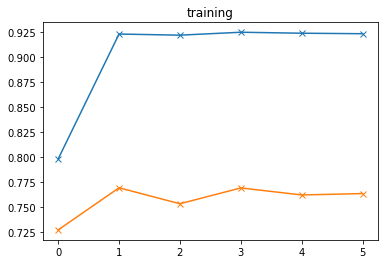

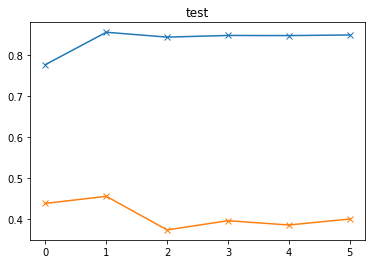

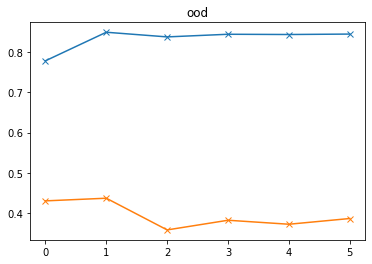

In [76]:
[plot_r2(285, setting, None ) for setting in ['training', 'test', 'ood']]

In [83]:
results[results.index==285]

,_id,config.overwrite,config.db_collection,config.dataset.data_params.covariate_keys,config.dataset.data_params.dataset_path,config.dataset.data_params.dose_key,config.dataset.data_params.mol_featurizer,config.dataset.data_params.perturbation_key,config.dataset.data_params.smiles_key,config.dataset.data_params.split_key,config.dataset.dataset_type,config.model.additional_params.decoder_activation,config.model.additional_params.doser_type,config.model.additional_params.loss_ae,config.model.additional_params.patience,config.model.additional_params.seed,config.model.gnn_model.GCN.hparams.n_layers,config.model.gnn_model.hparams.n_layers,config.model.gnn_model.model_type,config.model.hparams.adversary_depth,config.model.hparams.adversary_lr,config.model.hparams.adversary_steps,config.model.hparams.adversary_wd,config.model.hparams.adversary_width,config.model.hparams.autoencoder_depth,config.model.hparams.autoencoder_lr,config.model.hparams.autoencoder_wd,config.model.hparams.autoencoder_width,config.model.hparams.batch_size,config.model.hparams.dim,config.model.hparams.dosers_depth,config.model.hparams.dosers_lr,config.model.hparams.dosers_wd,config.model.hparams.dosers_width,config.model.hparams.dropout,config.model.hparams.penalty_adversary,config.model.hparams.reg_adversary,config.model.hparams.step_size_lr,config.training.checkpoint_freq,config.training.ignore_evaluation,config.training.max_minutes,config.training.num_epochs,config.training.save_checkpoints,config.training.save_dir,config.seed,host.hostname,host.os,host.python_version,host.cpu,host.gpus.gpus,host.gpus.driver_version,result.epoch,result.stats_epoch,result.loss_reconstruction,result.loss_adv_drugs,result.loss_adv_covariates,result.penalty_adv_drugs,result.penalty_adv_covariates,result.elapsed_time_min,result.training,result.test,result.ood,result.perturbation disentanglement,result.optimal for perturbations,result.covariate disentanglement,result.optimal for covariates,result.total_epochs
285,286,286,lincs_small_5,cell_id,datasets/lincs_smiles.h5ad,pert_dose,canonical,pert_id,canonical_smiles,split1,lincs,linear,None,gauss,3,0,2,2,None,3,0.000012,2,0.000001,256,5,0.000118,1.281819e-08,1024,64,512,3,0.000118,1.281819e-08,32,0.017971,0.012818,0.013924,45,40,False,600,2000,True,sweeps/checkpoints,43588939,gpusrv09.scidom.de,"[Linux, Linux-3.10.0-1160.25.1.el7.x86_64-x86_...",3.8.8,Intel(R) Xeon(R) Gold 6226R CPU @ 2.90GHz,"[{'model': 'Tesla V100S-PCIE-32GB', 'total_mem...",460.32.03,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0, 40, 80, 120, 160, 200]","[6069.711614906788, 1822.7329741716385, 1367.6...","[1080.3050434589386, 535.218443363905, 320.171...","[11494.703802108765, 8956.650183200836, 6880.2...","[3356.7891820669174, 9069.542027235031, 5922.8...","[106.71880178526044, 100.06114570051432, 21.32...",97.395643,"[[0.7979024696952328, 0.7269594735710033, -2.7...","[[0.7767004189537313, 0.43853228823696516, -0....","[[0.7782015890114584, 0.4307116924542545, -1.5...","[[0], [0], [0], [0], [0], 0.009818745680644036]","[0.0010204081632653062, 0.0010204081632653062,...","[[0], [0], [0], [0], [0], [0.3866758075307559]]","[[0.012195121951219513], [0.012195121951219513...",200


In [85]:
results[results.index==285]['config.seed']

285    43588939
Name: config.seed, dtype: int64

In [89]:
disent_results = results.loc[:, [c for c in list(results) if 'disentanglement' in c or 'result.optimal' in c]]
disent_results

,result.perturbation disentanglement,result.optimal for perturbations,result.covariate disentanglement,result.optimal for covariates
0,"[[0], [0], [0], [0], 0.022301067547654877]","[0.0010204081632653062, 0.0010204081632653062,...","[[0], [0], [0], [0], [0.9973794955543802]]","[[0.012195121951219513], [0.012195121951219513..."
1,"[[0], [0], [0], [0], nan]","[0.0010204081632653062, 0.0010204081632653062,...","[[0], [0], [0], [0], [nan]]","[[0.012195121951219513], [0.012195121951219513..."
2,"[[0], [0], [0], [0], [0], 0.0021052735012920603]","[0.0010204081632653062, 0.0010204081632653062,...","[[0], [0], [0], [0], [0], [0.014265271989952347]]","[[0.012195121951219513], [0.012195121951219513..."
3,"[[0], [0], [0], [0], [0], 0.017542218812422218]","[0.0010204081632653062, 0.0010204081632653062,...","[[0], [0], [0], [0], [0], [0.8884737872530218]]","[[0.012195121951219513], [0.012195121951219513..."
4,"[[0], [0], [0], [0], [0], 0.019368169940584923]","[0.0010204081632653062, 0.0010204081632653062,...","[[0], [0], [0], [0], [0], [0.9892575311997952]]","[[0.012195121951219513], [0.012195121951219513..."
...,...,...,...,...
295,"[[0], [0], [0], [0], [0], 0.007367985832130471]","[0.0010204081632653062, 0.0010204081632653062,...","[[0], [0], [0], [0], [0], [0.49958301637806546]]","[[0.012195121951219513], [0.012195121951219513..."
296,"[[0], [0], [0], [0], [0], 0.0019425469009465037]","[0.0010204081632653062, 0.0010204081632653062,...","[[0], [0], [0], [0], [0], [0.015320721223108411]]","[[0.012195121951219513], [0.012195121951219513..."
297,"[[0], [0], [0], [0], [0], 0.018982924689954796]","[0.0010204081632653062, 0.0010204081632653062,...","[[0], [0], [0], [0], [0], [0.8965415144728828]]","[[0.012195121951219513], [0.012195121951219513..."
298,"[[0], [0], [0], [0], [0], 0.002408530022764276]","[0.0010204081632653062, 0.0010204081632653062,...","[[0], [0], [0], [0], [0], [0.9996040659756286]]","[[0.012195121951219513], [0.012195121951219513..."


In [95]:
for c in list(disent_results):
    disent_results[c] = disent_results[c].apply(lambda x: list(x)[-1])

In [96]:
disent_results

,result.perturbation disentanglement,result.optimal for perturbations,result.covariate disentanglement,result.optimal for covariates
0,0.022301,0.00102,[0.9973794955543802],[0.012195121951219513]
1,NaN,0.00102,[nan],[0.012195121951219513]
2,0.002105,0.00102,[0.014265271989952347],[0.012195121951219513]
3,0.017542,0.00102,[0.8884737872530218],[0.012195121951219513]
4,0.019368,0.00102,[0.9892575311997952],[0.012195121951219513]
...,...,...,...,...
295,0.007368,0.00102,[0.49958301637806546],[0.012195121951219513]
296,0.001943,0.00102,[0.015320721223108411],[0.012195121951219513]
297,0.018983,0.00102,[0.8965415144728828],[0.012195121951219513]
298,0.002409,0.00102,[0.9996040659756286],[0.012195121951219513]


In [97]:
results[results.index==296]

,_id,config.overwrite,config.db_collection,config.dataset.data_params.covariate_keys,config.dataset.data_params.dataset_path,config.dataset.data_params.dose_key,config.dataset.data_params.mol_featurizer,config.dataset.data_params.perturbation_key,config.dataset.data_params.smiles_key,config.dataset.data_params.split_key,config.dataset.dataset_type,config.model.additional_params.decoder_activation,config.model.additional_params.doser_type,config.model.additional_params.loss_ae,config.model.additional_params.patience,config.model.additional_params.seed,config.model.gnn_model.GCN.hparams.n_layers,config.model.gnn_model.hparams.n_layers,config.model.gnn_model.model_type,config.model.hparams.adversary_depth,config.model.hparams.adversary_lr,config.model.hparams.adversary_steps,config.model.hparams.adversary_wd,config.model.hparams.adversary_width,config.model.hparams.autoencoder_depth,config.model.hparams.autoencoder_lr,config.model.hparams.autoencoder_wd,config.model.hparams.autoencoder_width,config.model.hparams.batch_size,config.model.hparams.dim,config.model.hparams.dosers_depth,config.model.hparams.dosers_lr,config.model.hparams.dosers_wd,config.model.hparams.dosers_width,config.model.hparams.dropout,config.model.hparams.penalty_adversary,config.model.hparams.reg_adversary,config.model.hparams.step_size_lr,config.training.checkpoint_freq,config.training.ignore_evaluation,config.training.max_minutes,config.training.num_epochs,config.training.save_checkpoints,config.training.save_dir,config.seed,host.hostname,host.os,host.python_version,host.cpu,host.gpus.gpus,host.gpus.driver_version,result.epoch,result.stats_epoch,result.loss_reconstruction,result.loss_adv_drugs,result.loss_adv_covariates,result.penalty_adv_drugs,result.penalty_adv_covariates,result.elapsed_time_min,result.training,result.test,result.ood,result.perturbation disentanglement,result.optimal for perturbations,result.covariate disentanglement,result.optimal for covariates,result.total_epochs
296,297,297,lincs_small_5,cell_id,datasets/lincs_smiles.h5ad,pert_dose,canonical,pert_id,canonical_smiles,split1,lincs,linear,None,gauss,3,0,2,2,None,3,0.000347,3,0.000204,64,4,0.003467,0.000002,512,128,256,1,0.003467,0.000002,128,0.384997,2.041647,12.02193,45,40,False,600,2000,True,sweeps/checkpoints,163890034,supergpu05.scidom.de,"[Linux, Linux-3.10.0-1160.25.1.el7.x86_64-x86_...",3.8.8,AMD EPYC 7742 64-Core Processor,"[{'model': 'NVIDIA A100-SXM4-40GB', 'total_mem...",465.19.01,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0, 40, 80, 120, 160, 200]","[1592.4321561455727, 1006.4307510256767, 944.3...","[732.2916193604469, 597.9498112797737, 363.648...","[4011.0803203582764, 3591.768438100815, 3561.9...","[8.385440376558108, 1.1782039264508057, 5.8500...","[10.524533750722185, 3.3646350532071665, 1.807...",49.946215,"[[0.7801266808975154, 0.6407585835789721, -4.7...","[[0.7479694436699678, 0.35003333081265775, -1....","[[0.747371993354132, 0.34249630381932655, -2.1...","[[0], [0], [0], [0], [0], 0.0019425469009465037]","[0.0010204081632653062, 0.0010204081632653062,...","[[0], [0], [0], [0], [0], [0.015320721223108411]]","[[0.012195121951219513], [0.012195121951219513...",200


[None, None, None]

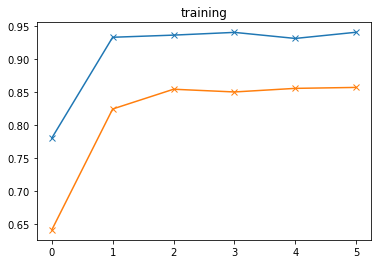

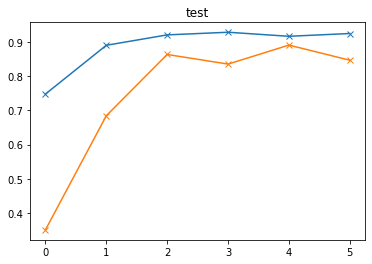

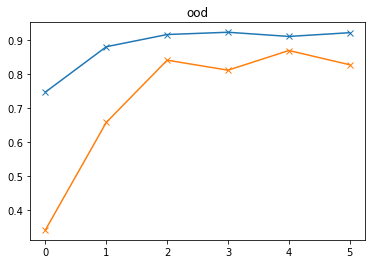

In [98]:
[plot_r2(296, setting, None ) for setting in ['training', 'test', 'ood']]